## Test of cbpro library

In [22]:
import pandas as pd
from datetime import date
import cbpro
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt

In [23]:
with open('CoinBaseAPIKey.key', 'r') as f:
    contents = f.readlines()
cb_key = contents[0].split(':')[-1].strip()
cb_secret = contents[1].split(':')[-1].strip()

In [24]:
#Download data
public_client = cbpro.PublicClient()

BTC_USDT1 = public_client.get_product_historic_rates('BTC-USDT', '2023-01-01', '2023-06-01', 86400)
ETH_USDT1 = public_client.get_product_historic_rates('ETH-USDT', '2023-01-01', '2023-06-01', 86400)
BTC_USDT2 = public_client.get_product_historic_rates('BTC-USDT', '2022-07-01', '2022-12-31', 86400)
ETH_USDT2 = public_client.get_product_historic_rates('ETH-USDT', '2022-07-01', '2022-12-31', 86400)
BTC_USDT3 = public_client.get_product_historic_rates('BTC-USDT', '2022-01-01', '2022-06-30', 86400)
ETH_USDT3 = public_client.get_product_historic_rates('ETH-USDT', '2022-01-01', '2022-06-30', 86400)
BTC_USDT = BTC_USDT1 + BTC_USDT2 + BTC_USDT3
ETH_USDT = ETH_USDT1 + ETH_USDT2 + ETH_USDT3

In [25]:
# Rename columns
df_hist_data= pd.DataFrame(BTC_USDT)
df_hist_data.columns = [ 'date', 'BTC_low', 'BTC_high', 'BTC_open', 'BTC_close', 'BTC_volume' ]
df_hist_data['date']= df_hist_data['date'].apply(lambda x: date.fromtimestamp(x))
coin_res = [ETH_USDT]
coin_names = ['ETH']
for coin, name in zip (coin_res, coin_names):
    tmp = pd.DataFrame(coin)
    tmp.columns = [ 'date', 'low', 'high', 'open', 'close', 'volume' ]
    df_hist_data[f'{name}_close'] = tmp['close']

df_hist_data.sort_values(by=['date'], inplace=True)

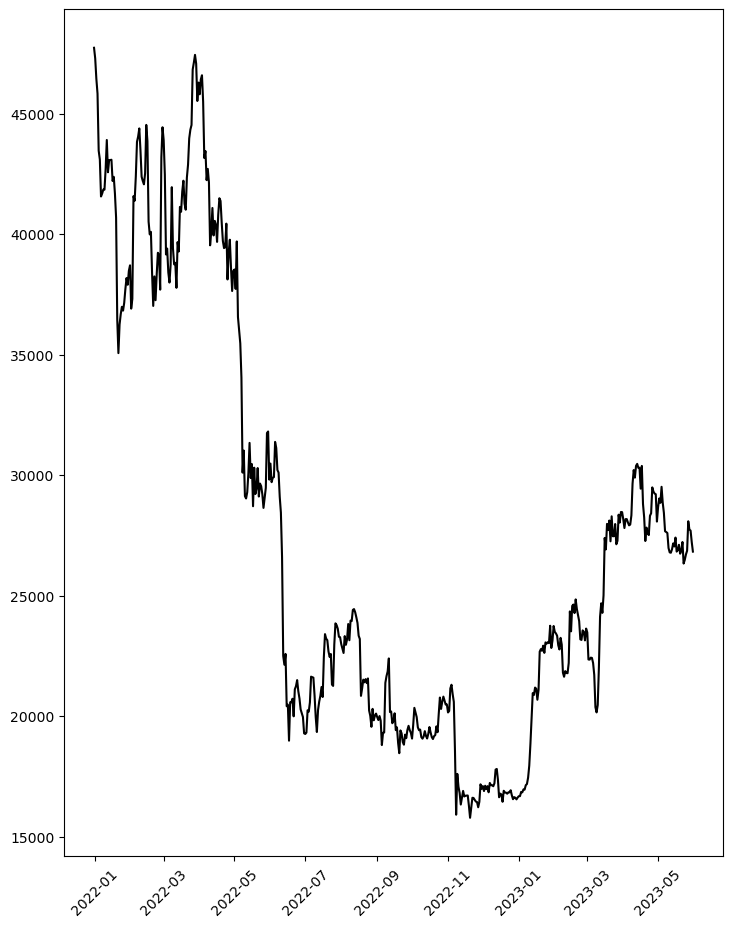

In [26]:
# Plot data we got
fig, ax = plt.subplots(1, 1, sharex = True)
fig.set_figheight(11)
fig.set_figwidth(8.5)
ax.plot(df_hist_data['date'], df_hist_data['BTC_close'], color = 'black', label = 'Historic price')
for tick in ax.get_xticklabels():
        tick.set_rotation(45)

In [27]:
scaler  = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(np.array(df_hist_data['BTC_close'].values).reshape(-1,1) )

In [28]:
prediction_days = 60
x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x,0])
x_train, y_train = (np.array(x_train), np.array(y_train))
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [29]:
model = Sequential()
model.add(LSTM(units = 50, activation='tanh', return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
optimizer = Adam(learning_rate=0.001, name='Adam')

model.compile(optimizer = optimizer, loss = 'mse', metrics=['accuracy'])
model.summary()

2024-02-25 20:30:38.803225: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-02-25 20:30:38.805198: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-02-25 20:30:38.806534: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_3 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_4 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                

2024-02-25 20:30:39.283504: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-02-25 20:30:39.285649: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-02-25 20:30:39.287391: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [30]:
model.fit(x_train, y_train, epochs=25, batch_size=8)

Epoch 1/25


2024-02-25 20:30:39.715430: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-02-25 20:30:39.717671: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-02-25 20:30:39.719706: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

58/58 [==============================] - 21s 252ms/step - loss: 0.0154 - accuracy: 0.0022
Epoch 2/25
58/58 [==============================] - 15s 264ms/step - loss: 0.0084 - accuracy: 0.0022
Epoch 3/25
58/58 [==============================] - 16s 275ms/step - loss: 0.0072 - accuracy: 0.0022
Epoch 4/25
58/58 [==============================] - 18s 304ms/step - loss: 0.0054 - accuracy: 0.0022
Epoch 5/25
58/58 [==============================] - 15s 249ms/step - loss: 0.0073 - accuracy: 0.0022
Epoch 6/25
58/58 [==============================] - 13s 222ms/step - loss: 0.0075 - accuracy: 0.0022
Epoch 7/25
58/58 [==============================] - 10s 175ms/step - loss: 0.0050 - accuracy: 0.0022
Epoch 8/25
58/58 [==============================] - 10s 172ms/step - loss: 0.0050 - accuracy: 0.0022
Epoch 9/25
58/58 [==============================] - 9s 154ms/step - loss: 0.0053 - accuracy: 0.0022
Epoch 10/25
58/58 [==============================] - 9s 151ms/step - loss: 0.0052 - accuracy: 0.0022
Ep

In [40]:
test_data = public_client.get_product_historic_rates('BTC-USDT', '2023-06-02', '2023-12-01', 86400)
test_data= pd.DataFrame(test_data)
test_data.columns = [ 'date', 'BTC_low', 'BTC_high', 'BTC_open', 'BTC_close', 'BTC_volume' ]
test_data['date']= test_data['date'].apply(lambda x: date.fromtimestamp(x))
test_data.sort_values(by=['date'], inplace=True)


In [41]:
total_dataset = pd.concat((df_hist_data[['date', 'BTC_close']], test_data[['date', 'BTC_close']]), axis = 0)
total_dataset.sort_values(by=['date'], inplace=True)
total_dataset = total_dataset.reset_index(drop=True)
model_inputs = total_dataset[len(total_dataset)-len(test_data)-prediction_days:]['BTC_close'].values
len(model_inputs)

243

In [44]:
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.fit_transform(model_inputs)

In [45]:
x_test = []
for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [46]:
prediction_prices = model.predict(x_test)

2024-02-25 20:47:26.675917: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-02-25 20:47:26.678088: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-02-25 20:47:26.680093: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

6/6 [==============================] - 2s 126ms/step


In [47]:
prediction_prices = scaler.inverse_transform(prediction_prices)

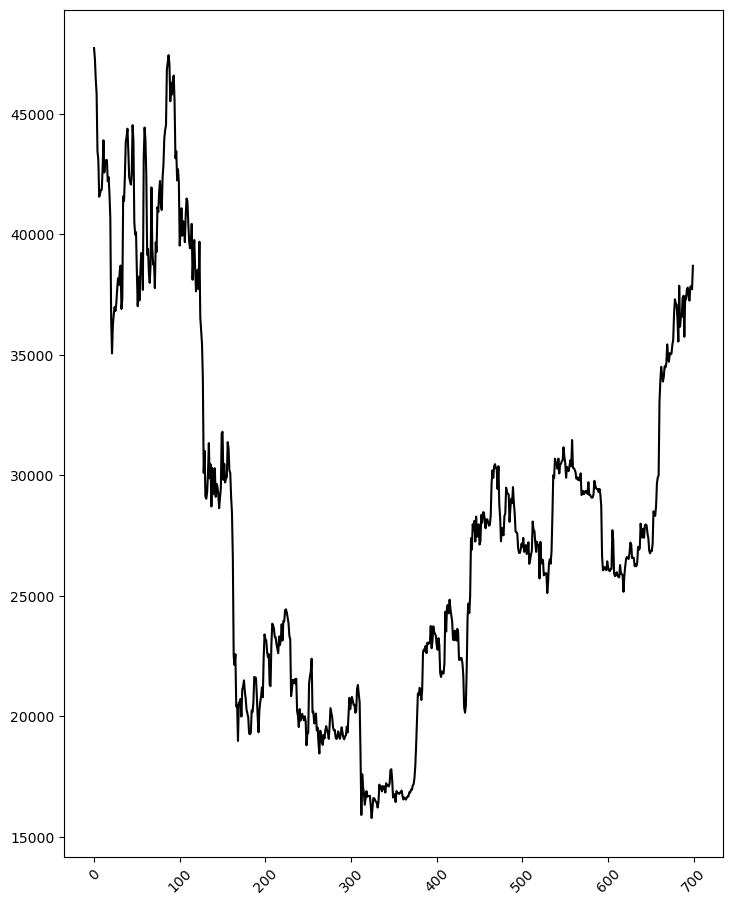

In [21]:
# Plot data we got
fig, ax = plt.subplots(1, 1, sharex = True)
fig.set_figheight(11)
fig.set_figwidth(8.5)
ax.plot(total_dataset['BTC_close'], color = 'black', label = 'Historic price')
for tick in ax.get_xticklabels():
        tick.set_rotation(45)